# 00_exploring_evi_nan_problems

__Problem:__ Script 17b failing on:
> if df_raster_analysis[index_analysis].isna().sum() > 0:
>>  raise NanValues('NaN values are still present after processing')

Confirmed nan values present on images by using 2021 data. Root cause: inf values present after interpolating and saving raster.

__Solution:__ Added transform inf to nans before starting interpolation process in links_iteration() function.

## __Import libraries__

In [1]:
from pathlib import Path
current_path = Path().resolve()
for parent in current_path.parents:
    if parent.name == "accesibilidad-urbana":
        project_root = parent
        break
print(project_root)

/home/observatorio/Documents/repos/accesibilidad-urbana


In [2]:
import os
import sys

import pandas as pd
import geopandas as gpd
import osmnx as ox
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

## __Script variables__

In [5]:
index_analysis='evi'

## __Load data__

In [10]:
gdf_raster_analysis = gpd.read_file(str(project_root)+'/data/processed/tmp_evi/local_save/Caracterizacion_aoi_evi_HexRes8_v0.geojson')

# Show
print(gdf_raster_analysis.shape)
gdf_raster_analysis.head(2)

(221, 20)


,hex_id,res,evi_mean,evi_std,evi_median,evi_max,evi_min,evi_diff,evi_tend,evi_2016,evi_2017,evi_2018,evi_2019,evi_2020,evi_2021,evi_2022,evi_2023,evi_2024,city,geometry
0,88499c5305fffff,8,2.652996,0.799400,2.430525,3.933528,2.026436,1.907091,0.010893,2.117519,2.145408,2.499291,2.272031,2.458012,2.944267,2.713353,3.543005,3.005585,Caracterizacion_aoi,"POLYGON ((-99.15878 21.24792, -99.1542 21.2508..."
1,88499c5361fffff,8,2.593464,0.846124,2.352362,3.871633,1.902628,1.969005,0.008933,2.051671,2.036420,2.980685,2.220126,2.497355,2.959391,2.570433,3.066134,2.778360,Caracterizacion_aoi,"POLYGON ((-99.14815 21.23307, -99.14356 21.236..."


In [4]:
df_raster_analysis = pd.read_csv(str(project_root)+'/data/processed/tmp_evi/local_save/Caracterizacion_aoi_evi_HexRes8_v0.csv')

# Show
print(df_raster_analysis.shape)
df_raster_analysis.head(2)

(22984, 7)


,Unnamed: 0,hex_id,res,evi,month,year,city
0,0,88499c5305fffff,8,2.221067,5,2016,Caracterizacion_aoi
1,1,88499c5361fffff,8,2.164593,5,2016,Caracterizacion_aoi


## __Problem analysis__

In [6]:
# Problem:
if df_raster_analysis[index_analysis].isna().sum() > 0:
    print('NaN values are still present after processing')

NaN values are still present after processing


### Find hexs with nans in map in search of a pattern (Not found)

In [8]:
df_raster_analysis.loc[df_raster_analysis[index_analysis].isna()].year.unique()

array([2017, 2018, 2021])

In [26]:
# Find hexs with nans in 2017
idx_2017 = (df_raster_analysis[index_analysis].isna()) & (df_raster_analysis['year']==2017)
hexs_nans_2017 = list(df_raster_analysis.loc[idx_2017].hex_id.unique())
print(f"Found {len(hexs_nans_2017)} hexs with nans in 2017.")

# Select those hexs in gdf
gdf_nans_2017 = gdf_raster_analysis.loc[gdf_raster_analysis.hex_id.isin(hexs_nans_2017)].copy()

# Show
print(gdf_nans_2017.shape)
gdf_nans_2017.head(1)

Found 31 hexs with nans in 2017.
(31, 20)


,hex_id,res,evi_mean,evi_std,evi_median,evi_max,evi_min,evi_diff,evi_tend,evi_2016,evi_2017,evi_2018,evi_2019,evi_2020,evi_2021,evi_2022,evi_2023,evi_2024,city,geometry
14,88499c5147fffff,8,NaN,NaN,1.954586,NaN,NaN,NaN,0.008112,1.846939,NaN,NaN,1.753827,NaN,1.964008,2.086026,2.569803,2.299528,Caracterizacion_aoi,"POLYGON ((-99.13767 21.28841, -99.13308 21.291..."


In [28]:
# Find hexs with nans in 2018
idx_2018 = (df_raster_analysis[index_analysis].isna()) & (df_raster_analysis['year']==2018)
hexs_nans_2018 = list(df_raster_analysis.loc[idx_2018].hex_id.unique())
print(f"Found {len(hexs_nans_2018)} hexs with nans in 2018.")

# Select those hexs in gdf
gdf_nans_2018 = gdf_raster_analysis.loc[gdf_raster_analysis.hex_id.isin(hexs_nans_2018)].copy()

# Show
print(gdf_nans_2018.shape)
gdf_nans_2018.head(1)

Found 14 hexs with nans in 2018.
(14, 20)


,hex_id,res,evi_mean,evi_std,evi_median,evi_max,evi_min,evi_diff,evi_tend,evi_2016,evi_2017,evi_2018,evi_2019,evi_2020,evi_2021,evi_2022,evi_2023,evi_2024,city,geometry
4,88499c5159fffff,8,NaN,NaN,2.304487,NaN,1.879921,NaN,0.009283,2.140229,2.135136,NaN,2.140034,2.382369,2.574033,2.531043,3.125012,2.753291,Caracterizacion_aoi,"POLYGON ((-99.1663 21.28639, -99.16171 21.2893..."


In [30]:
# Find hexs with nans in 2021
idx_2021 = (df_raster_analysis[index_analysis].isna()) & (df_raster_analysis['year']==2021)
hexs_nans_2021 = list(df_raster_analysis.loc[idx_2021].hex_id.unique())

print(f"Found {len(hexs_nans_2021)} hexs with nans in 2021.")

# Select those hexs in gdf
gdf_nans_2021 = gdf_raster_analysis.loc[gdf_raster_analysis.hex_id.isin(hexs_nans_2021)].copy()

# Show
print(gdf_nans_2021.shape)
gdf_nans_2021.head(1)

Found 1 hexs with nans in 2021.
(1, 20)


,hex_id,res,evi_mean,evi_std,evi_median,evi_max,evi_min,evi_diff,evi_tend,evi_2016,evi_2017,evi_2018,evi_2019,evi_2020,evi_2021,evi_2022,evi_2023,evi_2024,city,geometry
92,88499c88edfffff,8,NaN,NaN,1.743157,NaN,1.164638,NaN,0.00691,1.790858,1.315436,1.565084,1.751698,1.955665,NaN,2.048312,2.762851,1.995819,Caracterizacion_aoi,"POLYGON ((-99.7068 21.13021, -99.70222 21.1331..."


In [54]:
idx_2021 = (np.isinf(df_raster_analysis[index_analysis])) & (df_raster_analysis['year']==2021)
df_raster_analysis.loc[idx_2021]

,Unnamed: 0,hex_id,res,evi,month,year,city
14457,14457,88499c88edfffff,8,inf,10,2021,Caracterizacion_aoi
14594,14594,88499c5359fffff,8,inf,11,2021,Caracterizacion_aoi
14609,14609,88499c506bfffff,8,inf,11,2021,Caracterizacion_aoi
14612,14612,88499c5325fffff,8,inf,11,2021,Caracterizacion_aoi
14627,14627,88499c5265fffff,8,inf,11,2021,Caracterizacion_aoi
14630,14630,88499c514dfffff,8,inf,11,2021,Caracterizacion_aoi
14650,14650,88499c5353fffff,8,inf,11,2021,Caracterizacion_aoi
14660,14660,88499c5227fffff,8,inf,11,2021,Caracterizacion_aoi
14666,14666,88499c8917fffff,8,inf,11,2021,Caracterizacion_aoi
14750,14750,88499c89b1fffff,8,inf,11,2021,Caracterizacion_aoi


<Axes: >

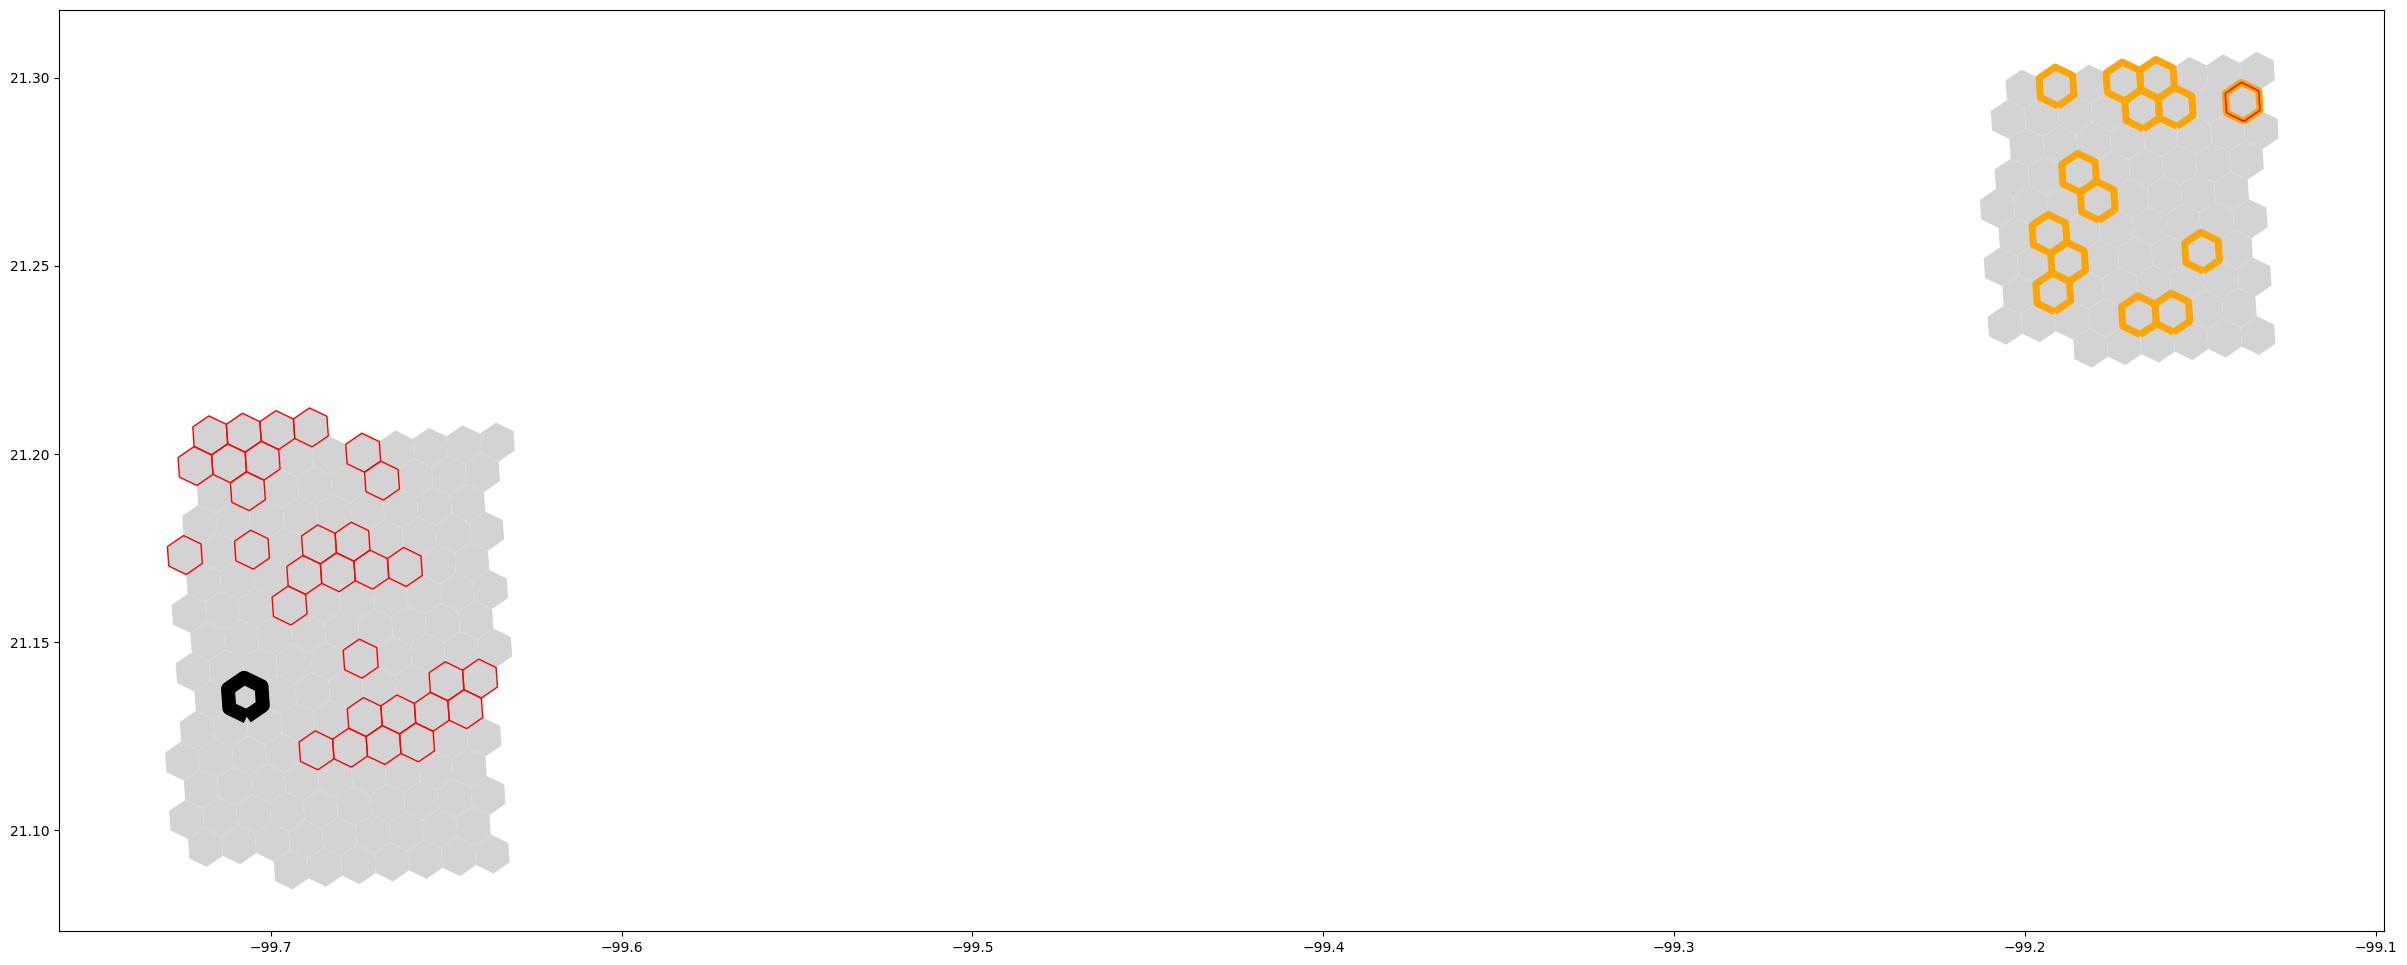

In [48]:
fig,ax = plt.subplots(figsize=(30,60))

gdf_nans_2017.plot(ax=ax,facecolor='None',edgecolor='red',zorder=3)
gdf_nans_2018.plot(ax=ax,facecolor='None',edgecolor='orange',linewidth=5,zorder=2)
gdf_nans_2021.plot(ax=ax,facecolor='None',edgecolor='black',linewidth=10,zorder=1)
gdf_raster_analysis.plot(ax=ax,facecolor='lightgray',zorder=0)

In [49]:
gdf_nans_2021.to_file(str(project_root)+'/data/processed/tmp_evi/local_save/2021_nans.gpkg')